In [1]:
import pandas as pd
import numpy as np
import pdfplumber
import re
import os
import warnings
from tqdm.auto import tqdm
warnings.filterwarnings('ignore')

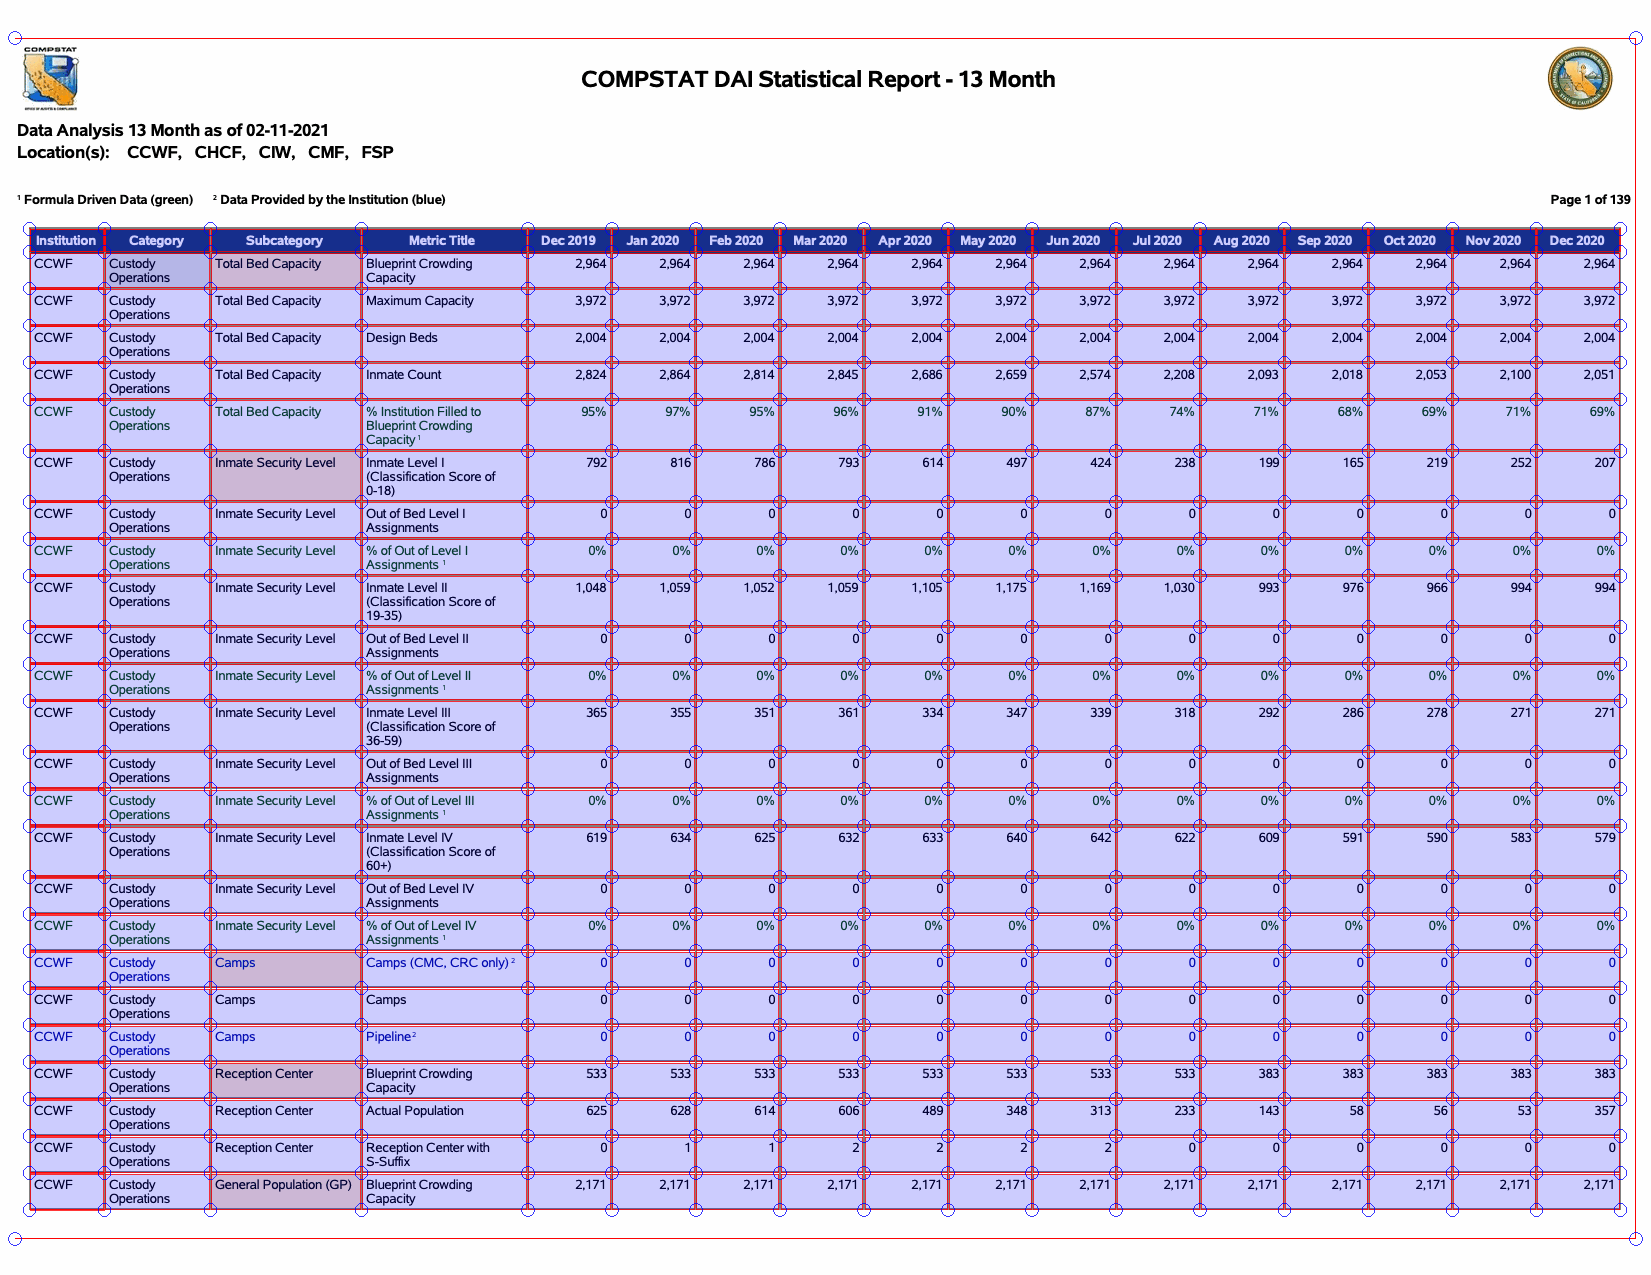

In [2]:
#test first page
pdf = pdfplumber.open("pdfs-2020-to-2023-population/2020_12_COMPSTAT_DAI_Female_Offenders.pdf")
first_page = pdf.pages[0]
im = first_page.to_image(resolution=150)
im.reset().debug_tablefinder()

In [24]:


# Clean each cell
def parse_value(txt):
    cid     = re.sub(r'\(cid\:\d+\)', ' ', txt) #remove (cid:13) type codes
    comma   = re.sub(r',', '', cid)             #remove comma separators
    newLine = re.sub(r'\n', ' ', comma)          #remove new lines
    return newLine 



# Get all the PDF file names from the pdfs-2020-to-2023-population directory
# Each year needs a different slice of months to prevent overlapping with each year.

pdf_files = [
    {"name" : "2020_12_COMPSTAT_DAI_Female_Offenders.pdf",         "date_range" : slice(5,None)},
    {"name" : "2020_12_COMPSTAT_DAI_General_Population_Males.pdf", "date_range" : slice(5,None)},
    {"name" : "2020_12_COMPSTAT_DAI_High_Security.pdf",            "date_range" : slice(5,None)},
    {"name" : "2020_12_COMPSTAT_DAI_Reception_Centers.pdf",        "date_range" : slice(5,None)},
    
    {"name" : "2021_12_COMPSTAT_DAI_Female_Offenders.pdf",         "date_range" : slice(5,None)},
    {"name" : "2021_12_COMPSTAT_DAI_General_Population_Males.pdf", "date_range" : slice(5,None)},
    {"name" : "2021_12_COMPSTAT_DAI_High_Security.pdf",            "date_range" : slice(5,None)},
    {"name" : "2021_12_COMPSTAT_DAI_Reception_Centers.pdf",        "date_range" : slice(5,None)},
    
    {"name" : "2023_01_COMPSTAT_DAI_Female_Offenders.pdf",         "date_range" : slice(4,16)},
    {"name" : "2023_01_COMPSTAT_DAI_General_Population_Males.pdf", "date_range" : slice(4,16)},
    {"name" : "2023_01_COMPSTAT_DAI_High_Security.pdf",            "date_range" : slice(4,16)},
    {"name" : "2023_01_COMPSTAT_DAI_Reception_Centers.pdf",        "date_range" : slice(4,16)},

    {"name" : "2023_06_COMPSTAT_DAI_Female_Offenders.pdf",         "date_range" : slice(11,None)},
    {"name" : "2023_06_COMPSTAT_DAI_General_Population_Males.pdf", "date_range" : slice(11,None)},
    {"name" : "2023_06_COMPSTAT_DAI_High_Security.pdf",            "date_range" : slice(11,None)},
    {"name" : "2023_06_COMPSTAT_DAI_Reception_Centers.pdf",        "date_range" : slice(11,None)}
]


data = [] # holds each row as a dictionary

#loop through each page
for pdf_file in tqdm(pdf_files, position=0, leave=False):

    pdf = pdfplumber.open("pdfs-2020-to-2023-population/" + pdf_file["name"])

    for page in tqdm(pdf.pages, position=1, leave=False):
        
        table = page.extract_table()

        # first row is headers, so start on index 1
        for row in table[1:]:

            row_builder = {'Institution': parse_value(row[0]), 'Category':parse_value(row[1]), 'Subcategory':parse_value(row[2]), 'Metric Title': parse_value(row[3])}

            # for each cell with a date header (starts on index 4 of the row)
            for cell,month_year in enumerate(table[0][pdf_file['date_range']], start=pdf_file['date_range'].start): # extract headers like Jan 2020
                
                row_builder['Month'] = re.split(r'([A-Za-z]{3})\s(\d{4})', month_year)[1].capitalize()
                row_builder['Year']  = re.split(r'([A-Za-z]{3})\s(\d{4})', month_year)[2]
                row_builder['Value'] = parse_value(row[cell])
                
                data.append(row_builder.copy())
                #df = pd.concat([df, pd.DataFrame([row_builder])], ignore_index=True)

    pdf.close()
            
df = pd.DataFrame(data)
df

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

,Institution,Category,Subcategory,Metric Title,Month,Year,Value
0,CCWF,Custody Operations,Total Bed Capacity,Blueprint Crowding Capacity,Jan,2020,2964
1,CCWF,Custody Operations,Total Bed Capacity,Blueprint Crowding Capacity,Feb,2020,2964
2,CCWF,Custody Operations,Total Bed Capacity,Blueprint Crowding Capacity,Mar,2020,2964
3,CCWF,Custody Operations,Total Bed Capacity,Blueprint Crowding Capacity,Apr,2020,2964
4,CCWF,Custody Operations,Total Bed Capacity,Blueprint Crowding Capacity,May,2020,2964
...,...,...,...,...,...,...,...
874555,WSP,Administration,Adverse Actions,Dismissals (Medical) 2,Feb,2023,0
874556,WSP,Administration,Adverse Actions,Dismissals (Medical) 2,Mar,2023,0
874557,WSP,Administration,Adverse Actions,Dismissals (Medical) 2,Apr,2023,0
874558,WSP,Administration,Adverse Actions,Dismissals (Medical) 2,May,2023,0


In [27]:
# Some rows duplicated because the values repeat and refer to rows above them. 
# TODO: Identify which Metric Titles repeat and append unique identifiers to signify 
# they are descendents of the rows above them.
df[df.duplicated()]

,Institution,Category,Subcategory,Metric Title,Month,Year,Value
1824,CCWF,Custody Operations,Number of Incidents,Per 100 inmates1,Jan,2020,0.00
1825,CCWF,Custody Operations,Number of Incidents,Per 100 inmates1,Feb,2020,0.00
1826,CCWF,Custody Operations,Number of Incidents,Per 100 inmates1,Mar,2020,0.00
1827,CCWF,Custody Operations,Number of Incidents,Per 100 inmates1,Apr,2020,0.00
1828,CCWF,Custody Operations,Number of Incidents,Per 100 inmates1,May,2020,0.00
...,...,...,...,...,...,...,...
874532,WSP,Administration,Adverse Actions,Per 100 Staff 1,Mar,2023,0.19
874533,WSP,Administration,Adverse Actions,Per 100 Staff 1,Apr,2023,0.37
874534,WSP,Administration,Adverse Actions,Per 100 Staff 1,May,2023,0.09
874535,WSP,Administration,Adverse Actions,Per 100 Staff 1,Jun,2023,0.09


In [28]:
df.to_csv("finished-csvs/finished-2020-2023-population.csv", encoding="utf-8", index=False)